多元羅吉斯回歸

Mounted at /content/gdrive


,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,x43,x44,x45,x46,x47,x48,x49,x50,x51,y
0,28,9,7,21,40,1,15,40,14,187,...,0,0,0,0,0,0,0,0,0,0
1,28,9,7,21,40,1,15,40,14,187,...,0,0,0,0,0,0,0,0,0,0
2,28,9,7,21,40,1,15,40,14,187,...,0,0,0,0,0,0,0,0,0,0
3,28,9,7,21,40,1,15,40,14,187,...,0,0,0,0,0,0,0,0,0,0
4,28,9,7,21,40,1,15,40,14,187,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13903,38,58,1,2,204,0,7,38,36,141,...,0,0,0,0,0,0,0,0,0,0
13904,38,58,1,2,204,0,7,38,36,141,...,0,0,0,0,0,0,0,0,0,0
13905,38,58,1,2,204,0,7,38,36,141,...,0,0,0,0,0,0,0,0,0,0
13906,38,58,1,2,204,0,7,38,36,141,...,0,0,0,0,0,0,0,0,0,0


Class=0, n=5943 (64.626%)
Class=10, n=488 (5.307%)
Class=1, n=104 (1.131%)
Class=5, n=326 (3.545%)
Class=9, n=504 (5.481%)
Class=4, n=323 (3.512%)
Class=3, n=278 (3.023%)
Class=8, n=357 (3.882%)
Class=7, n=340 (3.697%)
Class=2, n=102 (1.109%)
Class=6, n=431 (4.687%)


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


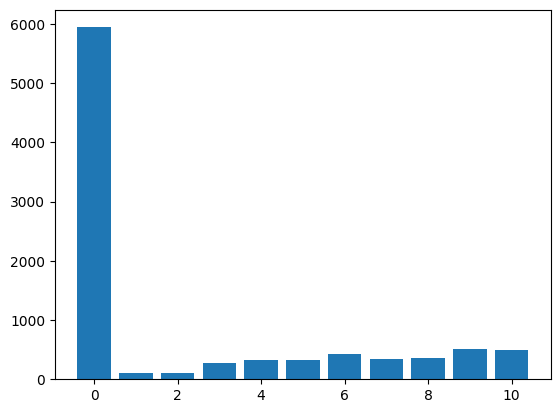

Class=0, n=5943 (9.091%)
Class=10, n=5943 (9.091%)
Class=1, n=5943 (9.091%)
Class=5, n=5943 (9.091%)
Class=9, n=5943 (9.091%)
Class=4, n=5943 (9.091%)
Class=3, n=5943 (9.091%)
Class=8, n=5943 (9.091%)
Class=7, n=5943 (9.091%)
Class=2, n=5943 (9.091%)
Class=6, n=5943 (9.091%)


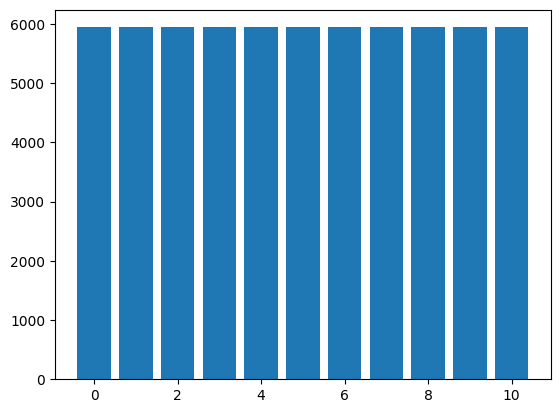

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1396: UserWarning: Note that pos_label (set to 0) is ignored when average != 'binary' (got 'weighted'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


Accuracy: 0.6959899749373434
Precision (Positive Predictive Value): 0.7994513490809527
Sensitivity/Recall : 0.6959899749373434
F1 Score : 0.7219277373501709
specificity : 0.6959899749373434


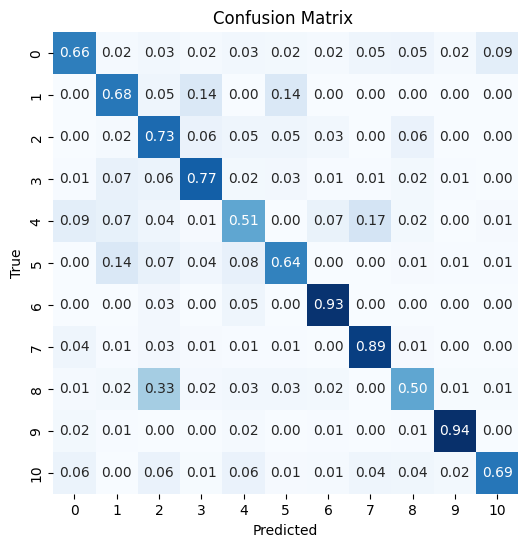

In [1]:
import pandas as pd
from google.colab import drive
drive.mount("/content/gdrive")

import numpy as np
import math
import sklearn
import sklearn.preprocessing
import matplotlib.pyplot as plt
import tensorflow.compat.v1 as tf
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn import linear_model

# parameters
x_no= 51    ## x的變數個數
y_no= 1     ## y的變數個數
data_length= 366
person=38

window=15  #利用前5筆去預測下1筆
ahead=1  #往後預測1筆
seq_len = window + ahead

# read data file
dataset=pd.read_csv('/content/gdrive/MyDrive/專案code/Cigarette_Brand/A1_38.csv')
display(dataset)
df_stock = dataset.copy()
df_stock = df_stock.dropna()  ## 去掉空的資料列!!

df_stock_X = df_stock.iloc[:,:-1]
df_stock_Y = df_stock.iloc[:,-1]

# normalize the dataset
from sklearn import preprocessing as skpp
from pandas import DataFrame

scaler = skpp.MinMaxScaler(feature_range=(0, 1))
df_stock_Xnorm = DataFrame(scaler.fit_transform(df_stock_X))

## 轉 DataFrame
df_stock_Y = DataFrame(df_stock_Y)

##  X and Y合併
df_stock_Xnorm['tmp'] = np.arange(0,len(df_stock_Xnorm))
df_stock_Y['tmp'] = np.arange(0,len(df_stock_Y))

df_stock_new= pd.merge(df_stock_Xnorm, df_stock_Y, on=['tmp'])
df_stock_new = df_stock_new.drop('tmp', axis=1)

df_stock_norm= df_stock_new

############################
# data windows + Splitting the dataset into Train, Valid & test data
valid_set_size_percentage = 1
test_set_size_percentage = 30

def load_data(stock, seq_len):
    data_raw = stock
    data = []
    for index in range(len(data_raw) - seq_len+1):
        data.append(data_raw[index: index + seq_len])
    data = np.array(data);
    valid_set_size = int(np.round(valid_set_size_percentage/100*data.shape[0]));
    test_set_size = int(np.round(test_set_size_percentage/100*data.shape[0]));
    train_set_size = data.shape[0] - (valid_set_size + test_set_size);
    x_train = data[:train_set_size,:window,: -y_no]
    y_train = data[:train_set_size,-1, -y_no:]
    x_valid = data[train_set_size:train_set_size+valid_set_size, :window,: -y_no]
    y_valid = data[train_set_size:train_set_size+valid_set_size,-1, -y_no:]
    x_test = data[train_set_size+valid_set_size:, :window,: -y_no]
    y_test = data[train_set_size+valid_set_size:,-1, -y_no:]
    return [x_train, y_train, x_valid, y_valid, x_test, y_test]

x_train, y_train, x_valid, y_valid, x_test, y_test= [],[],[],[],[],[]

for i in range(person):
    df_stock_norm_temp = df_stock_norm.iloc[np.arange(data_length*i, data_length*i + data_length),:]
    x_traint, y_traint, x_validt, y_validt, x_testt, y_testt = load_data(df_stock_norm_temp, seq_len)
    x_train.append(x_traint)
    y_train.append(y_traint)
    x_valid.append(x_validt)
    y_valid.append(y_validt)
    x_test.append(x_testt)
    y_test.append(y_testt)

##  4D      (人, 幾筆資料, 每筆資料的 window, 每筆資料的x變數個數)
##  to  3D  (共幾筆資料, 每筆資料的 window, 每筆資料的x變數個數)

x_train=np.reshape(np.array(x_train), (-1, window, x_no))
y_train=np.reshape(np.array(y_train), (-1, y_no))

x_valid=np.reshape(np.array(x_valid), (-1, window, x_no))
y_valid=np.reshape(np.array(y_valid), (-1, y_no))

x_test=np.reshape(np.array(x_test), (-1, window, x_no))
y_test=np.reshape(np.array(y_test), (-1, y_no))

#########################################
##  y level 分布
X=x_train
y=y_train

from sklearn.preprocessing import LabelEncoder
from collections import Counter

y = LabelEncoder().fit_transform(y)
counter = Counter(y)
for k,v in counter.items():
    per = v / len(y) * 100
    print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
plt.bar(counter.keys(), counter.values())
plt.show()

##########################
## SMOTE

from imblearn.over_sampling import SMOTE

X=np.reshape(np.array(X), (len(x_train), -1))
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)
counter = Counter(y)
for k,v in counter.items():
    per = v / len(y) * 100
    print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
plt.bar(counter.keys(), counter.values())
plt.show()

###########################
##  reshape x
X=np.reshape(np.array(X), (-1, window ,x_no))

y_level=len(np.unique(y))   ## y levels

##  one-hot encoding
from tensorflow.python.keras.utils.np_utils import to_categorical
y_oneshot = to_categorical(y)

y_valid= to_categorical(y_valid)
y_test= to_categorical(y_test)

x_train=X
y_train= y_oneshot

# parameters & Placeholders
n_steps = window
n_inputs = x_no
n_outputs = y_level
n_epochs = 50
batch_size = 100
train_set_size = x_train.shape[0]
test_set_size = x_test.shape[0]
tf.reset_default_graph()
tf.disable_eager_execution()

##用 tf.placeholder 創造出未來存放 x 與 y 值的地方
X = tf.compat.v1.placeholder(tf.float32, [None, n_steps, n_inputs])
y = tf.compat.v1.placeholder(tf.float32, [None, n_outputs])

# function to get the next batch
index_in_epoch = 0;
perm_array  = np.arange(x_train.shape[0])
np.random.shuffle(perm_array)  ## 隨機排列

def get_next_batch(batch_size):
    global index_in_epoch, x_train, perm_array
    start = index_in_epoch
    index_in_epoch += batch_size
    if index_in_epoch > x_train.shape[0]:
        np.random.shuffle(perm_array) # shuffle permutation array
        start = 0 # start next epoch
        index_in_epoch = batch_size
    end = index_in_epoch
    return x_train[perm_array[start:end]], y_train[perm_array[start:end]]

# Convert one-hot encoded labels to class labels
y_train_class = np.argmax(y_train, axis=1)

# Reshape the data for logistic regression
x_train_lr = np.reshape(x_train, (x_train.shape[0], -1))
x_test_lr = np.reshape(x_test, (x_test.shape[0], -1))

# Create and fit the logistic regression model
logreg = LogisticRegression(solver='lbfgs', max_iter=30, multi_class='multinomial')
logreg.fit(x_train_lr, y_train_class)

# Predict the labels for test data
y_pred = logreg.predict(x_test_lr)

# Calculate the accuracy
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(np.argmax(y_test, axis=1), y_pred)
print("Accuracy:", accuracy)

from sklearn.metrics import precision_score, recall_score, f1_score

# 計算 Precision
precision = precision_score(np.argmax(y_test, axis=1), y_pred, average='weighted')
print("Precision (Positive Predictive Value):", precision)
# 計算 Recall
recall = recall_score(np.argmax(y_test, axis=1), y_pred, average='weighted')
print("Sensitivity/Recall :", recall)
# 計算 F1 Score
f1 = f1_score(np.argmax(y_test, axis=1), y_pred, average='weighted')
print("F1 Score :", f1)
# 計算 Specificity
specificity = recall_score(np.argmax(y_test, axis=1), y_pred, average='weighted', pos_label=0)
print("specificity :", specificity)

from sklearn.metrics import confusion_matrix
import seaborn as sns

# 計算混淆矩陣
cm = confusion_matrix(np.argmax(y_test, axis=1), y_pred)

# 將混淆矩陣轉換為百分比
cm_percent = cm / cm.sum(axis=1, keepdims=True)

# 繪製混淆矩陣
plt.figure(figsize=(6, 6))
sns.heatmap(cm_percent, annot=True, cmap='Blues', fmt='.2f', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix ')
plt.show()

CART

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,x43,x44,x45,x46,x47,x48,x49,x50,x51,y
0,28,9,7,21,40,1,15,40,14,187,...,0,0,0,0,0,0,0,0,0,0
1,28,9,7,21,40,1,15,40,14,187,...,0,0,0,0,0,0,0,0,0,0
2,28,9,7,21,40,1,15,40,14,187,...,0,0,0,0,0,0,0,0,0,0
3,28,9,7,21,40,1,15,40,14,187,...,0,0,0,0,0,0,0,0,0,0
4,28,9,7,21,40,1,15,40,14,187,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13903,38,58,1,2,204,0,7,38,36,141,...,0,0,0,0,0,0,0,0,0,0
13904,38,58,1,2,204,0,7,38,36,141,...,0,0,0,0,0,0,0,0,0,0
13905,38,58,1,2,204,0,7,38,36,141,...,0,0,0,0,0,0,0,0,0,0
13906,38,58,1,2,204,0,7,38,36,141,...,0,0,0,0,0,0,0,0,0,0


Class=0, n=5943 (64.626%)
Class=10, n=488 (5.307%)
Class=1, n=104 (1.131%)
Class=5, n=326 (3.545%)
Class=9, n=504 (5.481%)
Class=4, n=323 (3.512%)
Class=3, n=278 (3.023%)
Class=8, n=357 (3.882%)
Class=7, n=340 (3.697%)
Class=2, n=102 (1.109%)
Class=6, n=431 (4.687%)


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


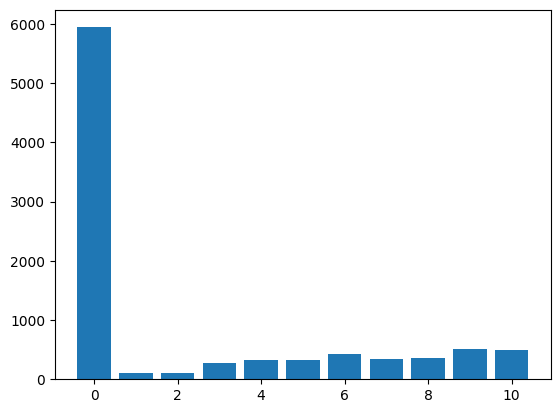

Class=0, n=5943 (9.091%)
Class=10, n=5943 (9.091%)
Class=1, n=5943 (9.091%)
Class=5, n=5943 (9.091%)
Class=9, n=5943 (9.091%)
Class=4, n=5943 (9.091%)
Class=3, n=5943 (9.091%)
Class=8, n=5943 (9.091%)
Class=7, n=5943 (9.091%)
Class=2, n=5943 (9.091%)
Class=6, n=5943 (9.091%)


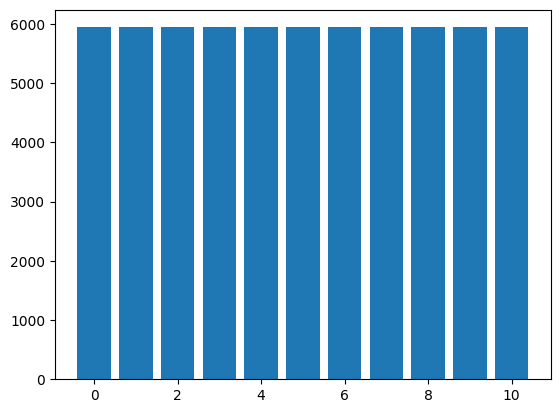

Training Accuracy: 0.14222997261866518
Test Accuracy: 0.39398496240601505
Confusion Matrix (Training Set):
 [[5891    0    0    1    3    0   48    0    0    0    0]
 [5939    0    0    2    1    0    1    0    0    0    0]
 [5921    0    0    0   20    0    2    0    0    0    0]
 [5866    0    0   66    0    0   11    0    0    0    0]
 [5626    0    0    0  245    0   72    0    0    0    0]
 [5939    0    0    0    1    0    3    0    0    0    0]
 [1506    0    0    0  131    0 4306    0    0    0    0]
 [5940    0    0    0    1    0    2    0    0    0    0]
 [5938    0    0    0    0    0    5    0    0    0    0]
 [5934    0    0    0    0    0    9    0    0    0    0]
 [5795    0    0    0   49    0   99    0    0    0    0]]
Confusion Matrix (Test Set):
 [[2272    0    0    1    3    0   32    0    0    0    0]
 [  22    0    0    0    0    0    0    0    0    0    0]
 [  58    0    0    1    0    0    4    0    0    0    0]
 [ 169    0    0    0    0    0    1    0    0   

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [4]:
import pandas as pd
from google.colab import drive
drive.mount("/content/gdrive")

# parameters
x_no= 51    ## x的變數個數
y_no= 1     ## y的變數個數
data_length= 366
person=38

window=15  #利用前5筆去預測下1筆
ahead=1  #往後預測1筆
seq_len = window + ahead

import numpy as np
import pandas as pd
import math
import sklearn
import sklearn.preprocessing
import matplotlib.pyplot as plt
import tensorflow.compat.v1 as tf

# read data file
dataset=pd.read_csv('/content/gdrive/MyDrive/專案code/Cigarette_Brand/A1_38.csv')
display(dataset)
df_stock = dataset.copy()
df_stock = df_stock.dropna()  ## 去掉空的資料列!!

df_stock_X = df_stock.iloc[:,:-1]
df_stock_Y = df_stock.iloc[:,-1]

# normalize the dataset
from sklearn import preprocessing as skpp
from pandas import DataFrame

scaler = skpp.MinMaxScaler(feature_range=(0, 1))
df_stock_Xnorm = DataFrame(scaler.fit_transform(df_stock_X))

## 轉 DataFrame
df_stock_Y = DataFrame(df_stock_Y)

##  X and Y合併
df_stock_Xnorm['tmp'] = np.arange(0,len(df_stock_Xnorm))
df_stock_Y['tmp'] = np.arange(0,len(df_stock_Y))

df_stock_new= pd.merge(df_stock_Xnorm, df_stock_Y, on=['tmp'])
df_stock_new = df_stock_new.drop('tmp', axis=1)

df_stock_norm= df_stock_new

############################
# data windows + Splitting the dataset into Train, Valid & test data
valid_set_size_percentage = 1
test_set_size_percentage = 30

def load_data(stock, seq_len):
    data_raw = stock
    data = []
    for index in range(len(data_raw) - seq_len+1):
        data.append(data_raw[index: index + seq_len])
    data = np.array(data);
    valid_set_size = int(np.round(valid_set_size_percentage/100*data.shape[0]));
    test_set_size = int(np.round(test_set_size_percentage/100*data.shape[0]));
    train_set_size = data.shape[0] - (valid_set_size + test_set_size);
    x_train = data[:train_set_size,:window,: -y_no]
    y_train = data[:train_set_size,-1, -y_no:]
    x_valid = data[train_set_size:train_set_size+valid_set_size, :window,: -y_no]
    y_valid = data[train_set_size:train_set_size+valid_set_size,-1, -y_no:]
    x_test = data[train_set_size+valid_set_size:, :window,: -y_no]
    y_test = data[train_set_size+valid_set_size:,-1, -y_no:]
    return [x_train, y_train, x_valid, y_valid, x_test, y_test]

x_train, y_train, x_valid, y_valid, x_test, y_test= [],[],[],[],[],[]

for i in range(person):
    df_stock_norm_temp = df_stock_norm.iloc[np.arange(data_length*i, data_length*i + data_length),:]
    x_traint, y_traint, x_validt, y_validt, x_testt, y_testt = load_data(df_stock_norm_temp, seq_len)
    x_train.append(x_traint)
    y_train.append(y_traint)
    x_valid.append(x_validt)
    y_valid.append(y_validt)
    x_test.append(x_testt)
    y_test.append(y_testt)

##  4D      (人, 幾筆資料, 每筆資料的 window, 每筆資料的x變數個數)
##  to  3D  (共幾筆資料, 每筆資料的 window, 每筆資料的x變數個數)

x_train=np.reshape(np.array(x_train), (-1, window, x_no))
y_train=np.reshape(np.array(y_train), (-1, y_no))

x_valid=np.reshape(np.array(x_valid), (-1, window, x_no))
y_valid=np.reshape(np.array(y_valid), (-1, y_no))

x_test=np.reshape(np.array(x_test), (-1, window, x_no))
y_test=np.reshape(np.array(y_test), (-1, y_no))

#########################################
##  y level 分布
X=x_train
y=y_train

from sklearn.preprocessing import LabelEncoder
from collections import Counter

y = LabelEncoder().fit_transform(y)
counter = Counter(y)
for k,v in counter.items():
    per = v / len(y) * 100
    print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
plt.bar(counter.keys(), counter.values())
plt.show()

##########################
## SMOTE

from imblearn.over_sampling import SMOTE

X=np.reshape(np.array(X), (len(x_train), -1))
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)
counter = Counter(y)
for k,v in counter.items():
    per = v / len(y) * 100
    print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
plt.bar(counter.keys(), counter.values())
plt.show()

###########################
##  reshape x
X=np.reshape(np.array(X), (-1, window ,x_no))

y_level=len(np.unique(y))   ## y levels

##  one-hot encoding
from tensorflow.python.keras.utils.np_utils import to_categorical
y_oneshot = to_categorical(y)

y_valid= to_categorical(y_valid)
y_test= to_categorical(y_test)

x_train=X
y_train= y_oneshot

# parameters & Placeholders
n_steps = window
n_inputs = x_no
n_outputs = y_level
n_epochs = 50
batch_size = 100
train_set_size = x_train.shape[0]
test_set_size = x_test.shape[0]
tf.reset_default_graph()
tf.disable_eager_execution()

##用 tf.placeholder 創造出未來存放 x 與 y 值的地方
X = tf.compat.v1.placeholder(tf.float32, [None, n_steps, n_inputs])
y = tf.compat.v1.placeholder(tf.float32, [None, n_outputs])

# function to get the next batch
index_in_epoch = 0;
perm_array  = np.arange(x_train.shape[0])
np.random.shuffle(perm_array)  ## 隨機排列

def get_next_batch(batch_size):
    global index_in_epoch, x_train, perm_array
    start = index_in_epoch
    index_in_epoch += batch_size
    if index_in_epoch > x_train.shape[0]:
        np.random.shuffle(perm_array) # shuffle permutation array
        start = 0 # start next epoch
        index_in_epoch = batch_size
    end = index_in_epoch
    return x_train[perm_array[start:end]], y_train[perm_array[start:end]]


from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Reshape the input arrays to 2D
nsamples, nx, ny = x_train.shape
x_train_2d = x_train.reshape((nsamples, nx*ny))

# Create and train the DecisionTreeClassifier
clf = DecisionTreeClassifier(criterion = 'gini', max_depth=3, min_samples_split=2, min_samples_leaf=5, random_state=30)
clf.fit(x_train_2d, y_train)

# Predict on the training set
y_train_pred = clf.predict(x_train_2d)
train_accuracy = accuracy_score(y_train, y_train_pred)
print("Training Accuracy:", train_accuracy)

# Reshape the test data to 2D
nsamples_test, nx_test, ny_test = x_test.shape
x_test_2d = x_test.reshape((nsamples_test, nx_test*ny_test))

# Predict on the test set
y_test_pred = clf.predict(x_test_2d)
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Test Accuracy:", test_accuracy)

from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

# Calculate predictions on the training set
y_train_pred = clf.predict(x_train_2d)

# Calculate predictions on the test set
y_test_pred = clf.predict(x_test_2d)

# Create confusion matrix for training set
train_cm = confusion_matrix(y_train.argmax(axis=1), y_train_pred.argmax(axis=1))
print("Confusion Matrix (Training Set):\n", train_cm)

# Create confusion matrix for test set
test_cm = confusion_matrix(y_test.argmax(axis=1), y_test_pred.argmax(axis=1))
print("Confusion Matrix (Test Set):\n", test_cm)

# Calculate precision (positive predictive value) for test set
precision = precision_score(y_test, y_test_pred, average='weighted')
print("Precision (Positive Predictive Value):", precision)

# Calculate sensitivity/recall (true positive rate) for test set
recall = recall_score(y_test, y_test_pred, average='weighted')
print("Sensitivity/Recall (True Positive Rate):", recall)

# Calculate F1 score for test set
f1 = f1_score(y_test, y_test_pred,average='weighted')
print("F1 Score:", f1)

#specificity
specificity_list = []
for i in range(10):
    # Calculate true negatives (TN), false positives (FP), false negatives (FN), true positives (TP) for each class
    tn = np.sum(np.delete(np.delete(test_cm, i, axis=0), i, axis=1))
    fp = np.sum(np.delete(test_cm, i, axis=0)[:, i])
    fn = np.sum(np.delete(test_cm, i, axis=1)[i, :])
    tp = test_cm[i, i]

    # Calculate specificity (true negative rate) for each class
    specificity = tn / (tn + fp)
    specificity_list.append(specificity)

    print("Specificity (True Negative Rate) for Class", i, ":", specificity)

# Calculate average specificity
average_specificity = np.mean(specificity_list)
print("Average Specificity:", average_specificity)

#import seaborn as sns
#import matplotlib.pyplot as plt

# Convert confusion matrix to percentage form
#test_cm_percent = test_cm / np.sum(test_cm)

# Plot confusion matrix
#plt.figure(figsize=(6, 6))
#sns.heatmap(test_cm_percent, annot=True, fmt=".2f", cmap="Blues")
#plt.title("CART Confusion Matrix (Percentage)")
#plt.xlabel("Predicted Class")
#plt.ylabel("True Class")
#plt.show()

Random Forest

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,x43,x44,x45,x46,x47,x48,x49,x50,x51,y
0,28,9,7,21,40,1,15,40,14,187,...,0,0,0,0,0,0,0,0,0,0
1,28,9,7,21,40,1,15,40,14,187,...,0,0,0,0,0,0,0,0,0,0
2,28,9,7,21,40,1,15,40,14,187,...,0,0,0,0,0,0,0,0,0,0
3,28,9,7,21,40,1,15,40,14,187,...,0,0,0,0,0,0,0,0,0,0
4,28,9,7,21,40,1,15,40,14,187,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13903,38,58,1,2,204,0,7,38,36,141,...,0,0,0,0,0,0,0,0,0,0
13904,38,58,1,2,204,0,7,38,36,141,...,0,0,0,0,0,0,0,0,0,0
13905,38,58,1,2,204,0,7,38,36,141,...,0,0,0,0,0,0,0,0,0,0
13906,38,58,1,2,204,0,7,38,36,141,...,0,0,0,0,0,0,0,0,0,0


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Class=0, n=5943 (64.626%)
Class=10, n=488 (5.307%)
Class=1, n=104 (1.131%)
Class=5, n=326 (3.545%)
Class=9, n=504 (5.481%)
Class=4, n=323 (3.512%)
Class=3, n=278 (3.023%)
Class=8, n=357 (3.882%)
Class=7, n=340 (3.697%)
Class=2, n=102 (1.109%)
Class=6, n=431 (4.687%)


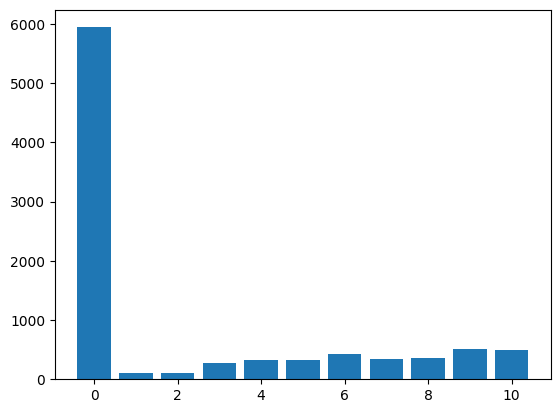

Class=0, n=5943 (9.091%)
Class=10, n=5943 (9.091%)
Class=1, n=5943 (9.091%)
Class=5, n=5943 (9.091%)
Class=9, n=5943 (9.091%)
Class=4, n=5943 (9.091%)
Class=3, n=5943 (9.091%)
Class=8, n=5943 (9.091%)
Class=7, n=5943 (9.091%)
Class=2, n=5943 (9.091%)
Class=6, n=5943 (9.091%)


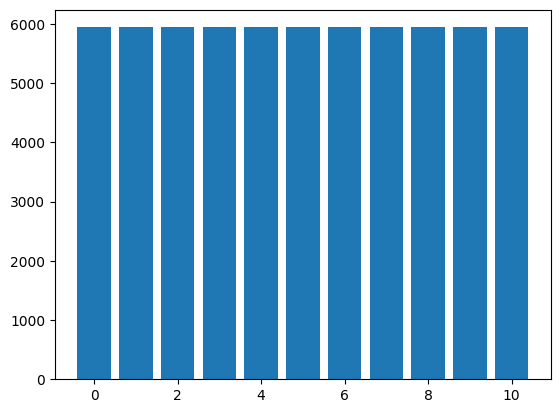

Training Accuracy: 0.6826365624952198
Test Accuracy: 0.6100250626566416
Confusion Matrix (Training Set):
 [[5430   24   26    4   84   22   33   62   88   66  104]
 [1748 4192    3    0    0    0    0    0    0    0    0]
 [2655   69 3219    0    0    0    0    0    0    0    0]
 [2439  251    0 3249    0    0    0    0    3    0    1]
 [2317  140   24    0 3448    5    1    2    6    0    0]
 [1684  631  197    0    0 3389    0    0   42    0    0]
 [ 483    0    1    0    0    0 5459    0    0    0    0]
 [ 927    0    0    0    0    0    0 4986   30    0    0]
 [2304    4  428    0    0    1    0    2 3159    0   45]
 [1062    0    0    0    0    0    0    0    0 4881    0]
 [1542  178    1   28    7    0    8    2   31  142 4004]]
Confusion Matrix (Test Set):
 [[1863   30   35    6   50   39   22   48   70   29  116]
 [   3   19    0    0    0    0    0    0    0    0    0]
 [  24    3   35    0    0    0    0    0    1    0    0]
 [  53   14    0   99    1    0    0    0    2    1

In [5]:
import pandas as pd
from google.colab import drive
drive.mount("/content/gdrive")

# parameters
x_no= 51    ## x的變數個數
y_no= 1     ## y的變數個數
data_length= 366
person=38

window=15  #利用前5筆去預測下1筆
ahead=1  #往後預測1筆
seq_len = window + ahead

import numpy as np
import pandas as pd
import math
import sklearn
import sklearn.preprocessing
import matplotlib.pyplot as plt
import tensorflow.compat.v1 as tf

# read data file
dataset=pd.read_csv('/content/gdrive/MyDrive/專案code/Cigarette_Brand/A1_38.csv')
display(dataset)
df_stock = dataset.copy()
df_stock = df_stock.dropna()  ## 去掉空的資料列!!

df_stock_X = df_stock.iloc[:,:-1]
df_stock_Y = df_stock.iloc[:,-1]

# normalize the dataset
from sklearn import preprocessing as skpp
from pandas import DataFrame

scaler = skpp.MinMaxScaler(feature_range=(0, 1))
df_stock_Xnorm = DataFrame(scaler.fit_transform(df_stock_X))

## 轉 DataFrame
df_stock_Y = DataFrame(df_stock_Y)

##  X and Y合併
df_stock_Xnorm['tmp'] = np.arange(0,len(df_stock_Xnorm))
df_stock_Y['tmp'] = np.arange(0,len(df_stock_Y))

df_stock_new= pd.merge(df_stock_Xnorm, df_stock_Y, on=['tmp'])
df_stock_new = df_stock_new.drop('tmp', axis=1)

df_stock_norm= df_stock_new

############################
# data windows + Splitting the dataset into Train, Valid & test data
valid_set_size_percentage = 1
test_set_size_percentage = 30

def load_data(stock, seq_len):
    data_raw = stock
    data = []
    for index in range(len(data_raw) - seq_len+1):
        data.append(data_raw[index: index + seq_len])
    data = np.array(data);
    valid_set_size = int(np.round(valid_set_size_percentage/100*data.shape[0]));
    test_set_size = int(np.round(test_set_size_percentage/100*data.shape[0]));
    train_set_size = data.shape[0] - (valid_set_size + test_set_size);
    x_train = data[:train_set_size,:window,: -y_no]
    y_train = data[:train_set_size,-1, -y_no:]
    x_valid = data[train_set_size:train_set_size+valid_set_size, :window,: -y_no]
    y_valid = data[train_set_size:train_set_size+valid_set_size,-1, -y_no:]
    x_test = data[train_set_size+valid_set_size:, :window,: -y_no]
    y_test = data[train_set_size+valid_set_size:,-1, -y_no:]
    return [x_train, y_train, x_valid, y_valid, x_test, y_test]

x_train, y_train, x_valid, y_valid, x_test, y_test= [],[],[],[],[],[]

for i in range(person):
    df_stock_norm_temp = df_stock_norm.iloc[np.arange(data_length*i, data_length*i + data_length),:]
    x_traint, y_traint, x_validt, y_validt, x_testt, y_testt = load_data(df_stock_norm_temp, seq_len)
    x_train.append(x_traint)
    y_train.append(y_traint)
    x_valid.append(x_validt)
    y_valid.append(y_validt)
    x_test.append(x_testt)
    y_test.append(y_testt)

##  4D      (人, 幾筆資料, 每筆資料的 window, 每筆資料的x變數個數)
##  to  3D  (共幾筆資料, 每筆資料的 window, 每筆資料的x變數個數)

x_train=np.reshape(np.array(x_train), (-1, window, x_no))
y_train=np.reshape(np.array(y_train), (-1, y_no))

x_valid=np.reshape(np.array(x_valid), (-1, window, x_no))
y_valid=np.reshape(np.array(y_valid), (-1, y_no))

x_test=np.reshape(np.array(x_test), (-1, window, x_no))
y_test=np.reshape(np.array(y_test), (-1, y_no))

#########################################
##  y level 分布
X=x_train
y=y_train

from sklearn.preprocessing import LabelEncoder
from collections import Counter

y = LabelEncoder().fit_transform(y)
counter = Counter(y)
for k,v in counter.items():
    per = v / len(y) * 100
    print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
plt.bar(counter.keys(), counter.values())
plt.show()

##########################
## SMOTE

from imblearn.over_sampling import SMOTE

X=np.reshape(np.array(X), (len(x_train), -1))
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)
counter = Counter(y)
for k,v in counter.items():
    per = v / len(y) * 100
    print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
plt.bar(counter.keys(), counter.values())
plt.show()

###########################
##  reshape x
X=np.reshape(np.array(X), (-1, window ,x_no))

y_level=len(np.unique(y))   ## y levels

##  one-hot encoding
from tensorflow.python.keras.utils.np_utils import to_categorical
y_oneshot = to_categorical(y)

y_valid= to_categorical(y_valid)
y_test= to_categorical(y_test)

x_train=X
y_train= y_oneshot

# parameters & Placeholders
n_steps = window
n_inputs = x_no
n_outputs = y_level
n_epochs = 50
batch_size = 100
train_set_size = x_train.shape[0]
test_set_size = x_test.shape[0]
tf.reset_default_graph()
tf.disable_eager_execution()

##用 tf.placeholder 創造出未來存放 x 與 y 值的地方
X = tf.compat.v1.placeholder(tf.float32, [None, n_steps, n_inputs])
y = tf.compat.v1.placeholder(tf.float32, [None, n_outputs])

# function to get the next batch
index_in_epoch = 0;
perm_array  = np.arange(x_train.shape[0])
np.random.shuffle(perm_array)  ## 隨機排列

def get_next_batch(batch_size):
    global index_in_epoch, x_train, perm_array
    start = index_in_epoch
    index_in_epoch += batch_size
    if index_in_epoch > x_train.shape[0]:
        np.random.shuffle(perm_array) # shuffle permutation array
        start = 0 # start next epoch
        index_in_epoch = batch_size
    end = index_in_epoch
    return x_train[perm_array[start:end]], y_train[perm_array[start:end]]

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Reshape the input arrays to 2D
nsamples, nx, ny = x_train.shape
x_train_2d = x_train.reshape((nsamples, nx*ny))

# Create a Random Forest classifier
rf = RandomForestClassifier(n_estimators=50,criterion='gini', max_depth=10)
rf.fit(x_train_2d, y_train)

# Predict on the training set
y_train_pred = rf.predict(x_train_2d)
train_accuracy = accuracy_score(y_train, y_train_pred)
print("Training Accuracy:", train_accuracy)

# Reshape the test data to 2D
nsamples_test, nx_test, ny_test = x_test.shape
x_test_2d = x_test.reshape((nsamples_test, nx_test*ny_test))

# Predict on the test set
y_test_pred = rf.predict(x_test_2d)
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Test Accuracy:", test_accuracy)

from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

# Calculate predictions on the training set
y_train_pred = rf.predict(x_train_2d)

# Calculate predictions on the test set
y_test_pred = rf.predict(x_test_2d)

# Create confusion matrix for training set
train_cm = confusion_matrix(y_train.argmax(axis=1), y_train_pred.argmax(axis=1))
print("Confusion Matrix (Training Set):\n", train_cm)

# Create confusion matrix for test set
test_cm = confusion_matrix(y_test.argmax(axis=1), y_test_pred.argmax(axis=1))
print("Confusion Matrix (Test Set):\n", test_cm)

# Calculate precision (positive predictive value) for test set
precision = precision_score(y_test, y_test_pred, average='weighted')
print("Precision (Positive Predictive Value):", precision)

# Calculate sensitivity/recall (true positive rate) for test set
recall = recall_score(y_test, y_test_pred, average='weighted')
print("Sensitivity/Recall (True Positive Rate):", recall)

# Calculate F1 score for test set
f1 = f1_score(y_test, y_test_pred,average='weighted')
print("F1 Score:", f1)

#specificity
specificity_list = []
for i in range(10):
    # Calculate true negatives (TN), false positives (FP), false negatives (FN), true positives (TP) for each class
    tn = np.sum(np.delete(np.delete(test_cm, i, axis=0), i, axis=1))
    fp = np.sum(np.delete(test_cm, i, axis=0)[:, i])
    fn = np.sum(np.delete(test_cm, i, axis=1)[i, :])
    tp = test_cm[i, i]

    # Calculate specificity (true negative rate) for each class
    specificity = tn / (tn + fp)
    specificity_list.append(specificity)

    print("Specificity (True Negative Rate) for Class", i, ":", specificity)

# Calculate average specificity
average_specificity = np.mean(specificity_list)
print("Average Specificity:", average_specificity)

#import seaborn as sns
#import matplotlib.pyplot as plt

# Convert confusion matrix to percentage form
#test_cm_percent = test_cm / np.sum(test_cm)

# Plot confusion matrix
#plt.figure(figsize=(6, 6))
#sns.heatmap(test_cm_percent, annot=True, fmt=".2f", cmap="Blues")
#plt.title("RF Confusion Matrix (Percentage)")
#plt.xlabel("Predicted Class")
#plt.ylabel("True Class")
#plt.show()